## Tarea 002 - Análisis Multimodal MIR
### Gustavo Hernández Angeles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_fun import *  # noqa: F403
from scipy.io import wavfile
from typing import Tuple
from pathlib import Path
import pandas as pd
import os
from fun import (
    get_all_notes,
    my_tokenizer,
)
from sklearn.model_selection import train_test_split
import seaborn as sns

# nota abajo D2 y D3, nota arriba D4

## Problema 3

### Inciso a)

In [5]:
def f(a:float,
      delta:float) -> float:
    return np.sign(a) * delta * np.floor(np.abs(a)/delta + 0.5)

### Inciso b)

In [6]:
def plot_cuantizada_y_error(x: np.ndarray, 
                    y: np.ndarray,
                    delta: float,
                    graph_path: str,
                    figsize=(8, 2.2)):
    y_cuantizada = f(y, delta)
    plt.figure(figsize=figsize)
    plt.plot(x, y, label='Señal original')
    plt.step(x, y_cuantizada, label='Señal cuantizada', where='mid')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.legend(loc='upper right')
    #plt.grid()
    plt.savefig(graph_path, bbox_inches='tight')
    plt.clf()
    
    plt.figure(figsize=figsize)
    plt.plot(x, np.abs(y - y_cuantizada), label='Error de cuantización')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Error de cuantización')
    plt.legend(loc='upper right')
    #plt.grid()
    plt.savefig(graph_path.replace('.pdf', '_error.pdf'), bbox_inches='tight')
    plt.clf()

In [7]:
## Función lineal
x = np.linspace(0, 5, 100)
y = 2 * x + 1
plot_cuantizada_y_error(x, y, delta=1, graph_path='../documento/figure/lineal_cuantizada.pdf')

<Figure size 800x220 with 0 Axes>

<Figure size 800x220 with 0 Axes>

In [8]:
## Función sinusoidal
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
plot_cuantizada_y_error(x, y, delta=0.5, graph_path='../documento/figure/sinusoidal_cuantizada.pdf')

<Figure size 800x220 with 0 Axes>

<Figure size 800x220 with 0 Axes>

### Inciso c)

In [9]:
def obtener_delta(bits: int,
                  y: np.ndarray) -> np.float64:
    lmbda = 2 ** bits
    y_max = np.max(y).astype(np.float64)
    y_min = np.min(y).astype(np.float64)
    return np.abs(y_max - y_min) / (lmbda - 1)

def obtener_cuantizada(wav_path: Path,
                       bits: int) -> Tuple[int, np.ndarray]:
    audio = wavfile.read(wav_path)
    sample_rate = audio[0]
    data = audio[1]
    delta = obtener_delta(bits, data)
    data_cuantizada = f(data, delta)
    return sample_rate, data_cuantizada, data

In [10]:
bits = [2,4,6,8]
wav_path = Path("../data/audio_raw/piano-loops-127-octave-120-bpm.wav")

os.makedirs("../data/audio_cuantizado/", exist_ok=True)

for b in bits:    
    sample_rate, data_cuantizada, _ = obtener_cuantizada(wav_path, b)
    wavfile.write(f"../data/audio_cuantizado/piano-loops-127-octave-120-bpm_{b}bits.wav",
                  sample_rate,
                  data_cuantizada.astype(np.int16))

/tmp/ipykernel_351509/1406793491.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  audio = wavfile.read(wav_path)


In [ ]:
bits = [2, 4, 6, 8]
wav_path = Path("../data/audio_raw/major.wav")

fig_quantized, ax_quantized = plt.subplots(figsize=(8, 2.2))
fig_error, ax_error = plt.subplots(figsize=(8, 2.2))


first_iteration = True

for b in bits:    
    # Obtener la señal original y la señal cuantizada
    sample_rate, data_cuantizada, data = obtener_cuantizada(wav_path, b)
    wavfile.write(f"../data/audio_cuantizado/major_{b}bits.wav",
                  sample_rate,
                  data_cuantizada.astype(np.int16))
    
    x = np.linspace(0, len(data_cuantizada) / sample_rate, len(data_cuantizada))
    print(f"Valores únicos en la señal cuantizada a {b} bits: {len(np.unique(data_cuantizada))}")
    
    # Datos entre 2 y 2.005 segundos
    idx = (x > 2) & (x < 2.005)
    x_filtered = x[idx]
    data_cuantizada_filtered = data_cuantizada[idx, 1]
    data_filtered = data[idx, 1]
    
    # Imprime la señal original solo en la primera iteración
    if first_iteration:
        ax_quantized.plot(x_filtered, data_filtered, label='Original', 
                         alpha=0.7, color='black', linewidth=1.5)
        first_iteration = False
    
    # Grafica la señal cuantizada para cada profundidad de bits
    ax_quantized.plot(x_filtered, data_cuantizada_filtered, 
                     label=f'Cuant. {b} bits', alpha=0.9)

    # Grafica el error de cuantización para cada profundidad de bits
    ax_error.plot(x_filtered, np.abs(data_filtered - data_cuantizada_filtered),
                 label=f'Error {b} bits')

# Plot de señal
ax_quantized.set_xlabel('Tiempo [s]')
ax_quantized.set_ylabel('Amplitud')
ax_quantized.legend(loc="upper left", bbox_to_anchor=(1.01, 1))
fig_quantized.savefig('../documento/figure/major_cuantizada_all.pdf', bbox_inches='tight')
plt.close(fig_quantized)

# Plot de error
ax_error.set_xlabel('Tiempo [s]')
ax_error.set_ylabel('Error de cuantización')
ax_error.legend(loc="upper left", bbox_to_anchor=(1.01, 1))
fig_error.savefig('../documento/figure/major_error_cuantizacion_all.pdf', bbox_inches='tight')
plt.close(fig_error)

Valores únicos en la señal cuantizada a 2 bits: 4
Valores únicos en la señal cuantizada a 4 bits: 16
Valores únicos en la señal cuantizada a 6 bits: 64
Valores únicos en la señal cuantizada a 8 bits: 256


In [12]:
bits = [2,4,6,8]
wav_path = Path("../data/audio_raw/Guitar_MoreThanWords_16bit_44.1kHz_stereo.wav")

for b in bits:    
    sample_rate, data_cuantizada, _ = obtener_cuantizada(wav_path, b)
    wavfile.write(f"../data/audio_cuantizado/Guitar_MoreThanWords_16bit_44.1kHz_stereo_{b}bits.wav",
                  sample_rate,
                  data_cuantizada.astype(np.int16))

## Problema 4


### Inciso a): Crear corpus.

In [2]:
midi_dirs_path = [Path(os.path.join("../data/midi_selected/", i)) 
                  for i in os.listdir("../data/midi_selected/") 
                  if os.path.isdir(os.path.join("../data/midi_selected/", i))]
midi_dirs_path[0].name

'scarlatti'

In [ ]:
# Creamos todas las notas y las guardamos en ../data/notes/
os.makedirs("../data/notes/", exist_ok=True)
for midi_dir in midi_dirs_path:
    y = midi_dir.name
    get_all_notes(midi_dir, "../data/notes/", y)

In [2]:
corpus_path = "../data/corpus.csv"

In [ ]:
# Creamos el csv con todas las notas y el autor correspondiente
with open(corpus_path, 'w') as corpus_file:
    corpus_file.write("notes,author\n")
    notes_dir = Path("../data/notes/")
    for note_file in notes_dir.glob("*.txt"):
        author = note_file.stem.split("_")[0]
        with open(note_file, 'r') as n_f:
            note_content = n_f.read()
            corpus_file.write(f"{note_content},{author}\n")

In [37]:
# Conjuntos de entrenamiento y prueba
df = pd.read_csv(corpus_path)

df = df.dropna() # Nos aseguramos de eliminar filas con valores NaN

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["author"])

train_df.to_csv("../data/corpus_train.csv", index=False)
test_df.to_csv("../data/corpus_test.csv", index=False)

In [3]:
train_df = pd.read_csv("../data/corpus_train.csv")

In [4]:
train_df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   notes   4050 non-null   object
 1   author  4050 non-null   object
dtypes: object(2)
memory usage: 63.4+ KB


/tmp/ipykernel_384608/493568330.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10, horizontalalignment='center')


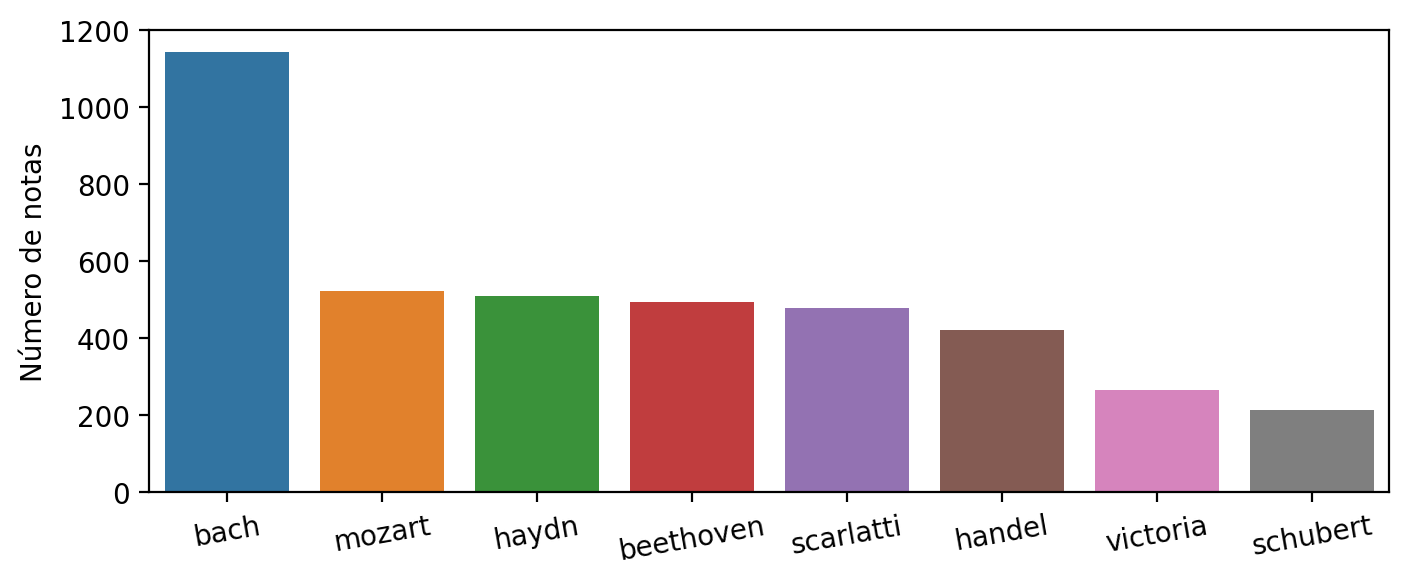

In [5]:
figures, ax = plt.subplots(figsize=(8,3))
sns.barplot(x=train_df["author"].value_counts().index,
            y=train_df["author"].value_counts().values, palette="tab10", legend=False,
            hue=train_df["author"].value_counts().index, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, horizontalalignment='center')
ax.set_ylabel("Número de notas")
ax.set_xlabel("")
plt.savefig('../documento/figure/notes_per_author_train.pdf', bbox_inches='tight')

### Inciso b)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.metrics import (
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    f1_score,
    classification_report,
    confusion_matrix,
    accuracy_score
)
import itertools
from scipy.sparse import csr_matrix
import optuna
from optuna import (
    Trial,
    Study
)
from sklearn.model_selection import cross_val_score

In [3]:
# Cargamos procesadores si previamente se ajustaron
vectorizer: TfidfVectorizer = pickle.load(open("../models/processor/tfidf_vectorizer.pkl", "rb"))
le: LabelEncoder = pickle.load(open("../models/processor/label_encoder.pkl", "rb"))

# Cargamos los datos si previamente se procesaron con tfidf
X_train: csr_matrix = pickle.load(open("../data/processed/X_train_tfidf.npz", "rb")) 
y_train: csr_matrix = pickle.load(open("../data/processed/y_train_tfidf.npz", "rb"))
X_test: csr_matrix = pickle.load(open("../data/processed/X_test_tfidf.npz", "rb"))
y_test: csr_matrix = pickle.load(open("../data/processed/y_test_tfidf.npz", "rb"))

In [3]:
vectorizer = TfidfVectorizer(token_pattern=r"\b[\w.#-]+\b", 
                             ngram_range=(1,3),
                             max_features=3000
                             )
train_df = pd.read_csv("../data/corpus_train.csv")
test_df = pd.read_csv("../data/corpus_test.csv")

y_train = train_df["author"].values.copy()
X_train = vectorizer.fit_transform(train_df["notes"].values)
y_test = test_df["author"].values.copy()
X_test = vectorizer.transform(test_df["notes"].values)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_unique = np.unique(y_train)

# Guardamos los datos procesados con tfidf
os.makedirs("../data/processed/", exist_ok=True)
with open("../data/processed/X_train_tfidf.npz", "wb") as f:
    pickle.dump(X_train, f)

with open("../data/processed/y_train_tfidf.npz", "wb") as f:
    pickle.dump(y_train, f)

with open("../data/processed/X_test_tfidf.npz", "wb") as f:
    pickle.dump(X_test, f)

with open("../data/processed/y_test_tfidf.npz", "wb") as f:
    pickle.dump(y_test, f)
    
# Guardamos los procesadores ajustados
with open("../models/processor/tfidf_vectorizer.pkl", "wb") as p_file:
    pickle.dump(vectorizer, p_file)

with open("../models/processor/label_encoder.pkl", "wb") as le_file:
    pickle.dump(le, le_file)

In [4]:
X_train.shape, X_test.shape

((4050, 3000), (1013, 3000))

In [5]:
def plot_confusion_matrix(cm, classes, title='Matriz de Confusión', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, fontsize=12, rotation=15)
    plt.yticks(tick_marks, classes, fontsize=16)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=14)

    plt.tight_layout()
    plt.savefig(f'../documento/figure/{title.replace(" ", "_").lower()}-cm.pdf', bbox_inches='tight')

In [6]:
%reload_ext cuml.accel

#### Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
import mlflow
import mlflow.sklearn

In [11]:
# Mlflow configuracion
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name("Autor Classification")

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Autor Classification")
mlflow.sklearn.autolog(disable=True)

In [ ]:
# Hyperparameter optimization with Optuna
def objective(trial: Trial) -> float:
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("max_depth", 10, 50, step=5)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)


    with mlflow.start_run(nested=True, run_name="RF Hyperopt Trial"):
        mlflow.log_params({
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "min_samples_split": min_samples_split,
            "min_samples_leaf": min_samples_leaf
        })
        
        rf = RandomForestClassifier(
            random_state=42,
            n_jobs=-1,
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf
        )

        scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1_macro' , n_jobs=-1)

        mlflow.log_metrics({
            "cv_f1_macro": scores.mean()
        })
        return scores.mean()


with mlflow.start_run(run_name="Random Forest Classifier Hyperopt"):
    study: Study = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(42))
    study.optimize(objective, n_trials=20)
    for key, value in study.best_trial.params.items():
        mlflow.log_param(key, value)
    mlflow.log_metric("best_cv_f1_macro", study.best_trial.value)


[I 2025-10-26 14:07:53,473] A new study created in memory with name: no-name-3132406d-1129-41ad-8133-33e8281967c4


[I 2025-10-26 14:08:09,046] Trial 0 finished with value: 0.7091562339421384 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7091562339421384.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/61e60133b5ef4c63b849d725ed67bce3
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:08:14,359] Trial 1 finished with value: 0.6753799167821775 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7091562339421384.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/f21c2901854249b3869631b8ff190c34
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:08:34,540] Trial 2 finished with value: 0.6953536086437685 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7091562339421384.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/07ba2424bd5a46e098d9e83da3eb7205
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:09:03,044] Trial 3 finished with value: 0.6958397923791042 and parameters: {'n_estimators': 900, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7091562339421384.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/55fd0d1104ef4ef6afc82a58152416f7
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:09:17,281] Trial 4 finished with value: 0.7215711990728592 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/4cb28a16f0014dfda6590c4682ca48d6
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:09:36,301] Trial 5 finished with value: 0.6933202550205362 and parameters: {'n_estimators': 700, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/2c83e67b966f48ecbc3eba92761b413b
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:09:53,554] Trial 6 finished with value: 0.7147205721925469 and parameters: {'n_estimators': 500, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/297857ec3a0f4739a8e1bd240d455d22
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:10:04,575] Trial 7 finished with value: 0.6374099074821358 and parameters: {'n_estimators': 600, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/1fd4bb07468e405da9c2a15debc685d0
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:10:07,532] Trial 8 finished with value: 0.6883300208655586 and parameters: {'n_estimators': 100, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/963a76e5f4264846a84c5a58668f35f5
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:10:14,588] Trial 9 finished with value: 0.6373521492063005 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/cf83e605556f4deea758b76435fa4806
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:10:20,177] Trial 10 finished with value: 0.6945010540087944 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/eff2257506ba429cb6f04e431c91bfac
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:10:30,297] Trial 11 finished with value: 0.7061820094362407 and parameters: {'n_estimators': 300, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/867f5172d2394468a4f642e758dd20bd
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:10:43,907] Trial 12 finished with value: 0.6845554805049562 and parameters: {'n_estimators': 600, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/bfc668c415eb46a49e247eaff9e115ae
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:11:09,656] Trial 13 finished with value: 0.6968544597085492 and parameters: {'n_estimators': 1000, 'max_depth': 50, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/a955ebaac29c445fb1e77d2a2881ee0b
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:11:12,905] Trial 14 finished with value: 0.6871204993060037 and parameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/6a1417148eaa4110943055d612df6402
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:11:24,520] Trial 15 finished with value: 0.7054666538747477 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/e7126b20413547a28ef77beb07309409
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:11:32,450] Trial 16 finished with value: 0.6951191338644549 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/132d93d3b8ca4b598bb7e3c9a09cca0b
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:11:36,335] Trial 17 finished with value: 0.7037034902597641 and parameters: {'n_estimators': 100, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/be7f4659cef44c509beb1841e0be4af3
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:11:39,793] Trial 18 finished with value: 0.6964657616230742 and parameters: {'n_estimators': 100, 'max_depth': 45, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/39d33b45611548b1bf890b964eab2dcf
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


[I 2025-10-26 14:11:54,963] Trial 19 finished with value: 0.6366087829208569 and parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 4 with value: 0.7215711990728592.


🏃 View run RF Hyperopt Trial at: http://localhost:5000/#/experiments/158961068890504212/runs/dc57272c35ec4a0f870914ff4ad4ad94
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212
🏃 View run Random Forest Classifier Hyperopt at: http://localhost:5000/#/experiments/158961068890504212/runs/e9a947528eb542cd953f7f6f808f7905
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


cuml.accel profile                                        
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Function ┃ GPU calls ┃ GPU time ┃ CPU calls ┃ CPU time ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total    │         0 │       0s │         0 │       0s │
└──────────┴───────────┴──────────┴───────────┴──────────┘

In [ ]:
# Top 3 modelos (por cross validation f1_macro)
top_models = client.search_runs(
    experiment_ids=[experiment.experiment_id],
    order_by=["metrics.cv_f1_macro desc"],
    filter_string="tags.mlflow.runName = 'RF Hyperopt Trial'",
    max_results=3
)

top_params = [run.data.params for run in top_models]
top_params[0]

{'n_estimators': '400',
 'min_samples_leaf': '2',
 'max_depth': '30',
 'min_samples_split': '5'}

In [ ]:
# Vemos cual de los top 3 modelos funciona mejor en el conjunto de prueba.

with mlflow.start_run(run_name="Best Random Forests Classifier"):
    for i, params in enumerate(top_params):
        
        with mlflow.start_run(nested=True, run_name=f"Top Model {i+1}"):
            mlflow.log_params(params)
            rf = RandomForestClassifier(random_state=42,
                                        n_jobs=-1,
                                        n_estimators=int(params["n_estimators"]),
                                        max_depth=int(params["max_depth"]),
                                        min_samples_split=int(params["min_samples_split"]),
                                        min_samples_leaf=int(params["min_samples_leaf"]))
            rf.fit(X_train, y_train)

            y_pred = rf.predict(X_test)

            f1_macro_test = f1_score(y_test, y_pred, average='weighted')
            f1_weighted_test = f1_score(y_test, y_pred, average='macro')
            accuracy_test = accuracy_score(y_test, y_pred)

            mlflow.log_metric("f1_macro_test", f1_macro_test)
            mlflow.log_metric("f1_weighted_test", f1_weighted_test)
            mlflow.log_metric("accuracy_test", accuracy_test)
            
            mlflow.sklearn.log_model(rf, name="random_forest_model")


2025/10/26 14:30:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 14:30:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Top Model 1 at: http://localhost:5000/#/experiments/158961068890504212/runs/84ab5762ea054a0881d818b236a88baf
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


2025/10/26 14:30:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 14:30:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Top Model 2 at: http://localhost:5000/#/experiments/158961068890504212/runs/6d241c4eb56d489aa1289c766b872a0f
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


2025/10/26 14:30:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 14:30:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Top Model 3 at: http://localhost:5000/#/experiments/158961068890504212/runs/7e852800ff9b4f469107c1c035fdb903
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212
🏃 View run Best Random Forests Classifier at: http://localhost:5000/#/experiments/158961068890504212/runs/4e7f4a3a7073484c998f7f5e7b968448
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


In [12]:
# Obtenemos el modelo que mejor desempeño tuvo en el conjunto de prueba.

best_rf_id = client.search_runs(
    experiment_ids=[experiment.experiment_id],
    order_by=["metrics.f1_macro_test desc"],
    filter_string="tags.mlflow.runName LIKE 'Top Model%'",
    max_results=1
)[0].outputs.model_outputs[0].model_id

best_rf_uri = client.get_logged_model(best_rf_id).model_uri

best_rf = mlflow.sklearn.load_model(best_rf_uri)

              precision    recall  f1-score   support

        bach       0.72      0.95      0.82       286
   beethoven       0.62      0.57      0.60       124
      handel       0.90      0.60      0.72       105
       haydn       0.62      0.60      0.61       128
      mozart       0.68      0.49      0.57       130
   scarlatti       0.87      0.93      0.90       119
    schubert       0.81      0.46      0.59        54
    victoria       0.92      0.97      0.94        67

    accuracy                           0.74      1013
   macro avg       0.77      0.70      0.72      1013
weighted avg       0.74      0.74      0.73      1013



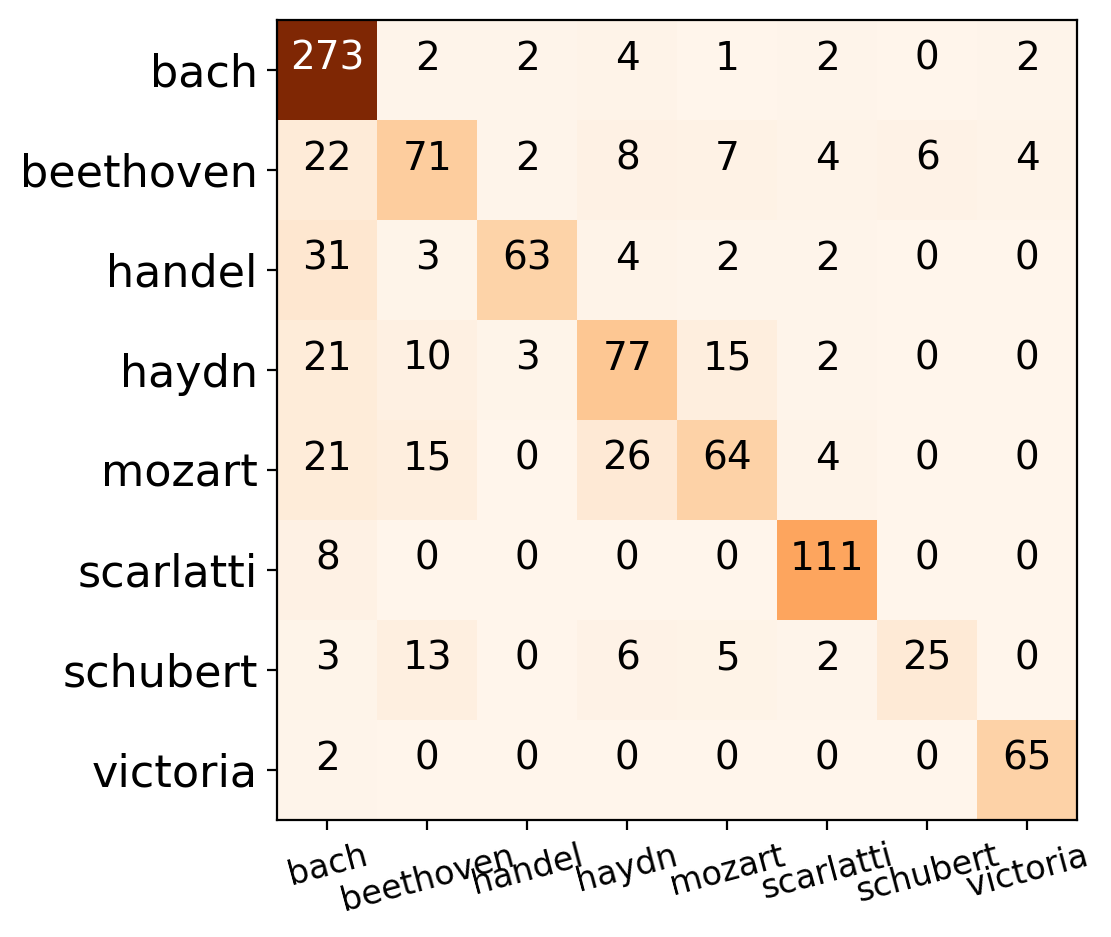

In [14]:
# Metricas de evaluación en el conjunto de prueba

y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, le.classes_, title="Random Forest", cmap=plt.cm.Oranges)
print(classification_report(y_test, y_pred, target_names=le.classes_))

#### XGBoost

In [7]:
import xgboost as xgb
import mlflow
import mlflow.xgboost

In [15]:
# Mlflow configuracion
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name("Autor Classification")

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Autor Classification")
mlflow.xgboost.autolog(disable=True)

In [9]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [ ]:
# Hyperparameter optimization with Optuna
def objective(trial: Trial) -> float:
    
    booster = "gbtree"
    device = "cuda"
    eta = trial.suggest_float("eta", 0.1, 0.4, step=0.01)
    gamma = trial.suggest_float("gamma", 0, 5, step=0.5)
    max_depth = trial.suggest_int("max_depth", 1, 10, step=1)
    

    with mlflow.start_run(nested=True, run_name="XGB Hyperopt"):
        
        xgb_params = {
            "booster": booster,
            "device": device,
            "objective": "multi:softmax",
            "num_class": len(np.unique(y_train)),
            "eval_metric": "mlogloss",
            "eta": eta,
            "gamma": gamma,
            "max_depth": max_depth
        }
        mlflow.log_params(xgb_params)
        
        bst = xgb.train(
                xgb_params, 
                dtrain,
                num_boost_round=200,
                evals=evallist,
                early_stopping_rounds=20
            )
        
        y_pred = bst.predict(dtest)
        scores = f1_score(y_test, y_pred, average='macro')
        
        mlflow.log_metric("f1_macro_test", scores)
        
        return scores
    
with mlflow.start_run(run_name="XGBoost Classifier Hyperopt"):
    study: Study = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(42))
    study.optimize(objective, n_trials=20)
    for key, value in study.best_trial.params.items():
        mlflow.log_param(key, value)
    mlflow.log_metric("best_f1_macro_test", study.best_trial.value)

[I 2025-10-26 16:01:06,609] A new study created in memory with name: no-name-a7b34e5a-9f3e-4647-9be2-f9cd8b73fe86


[0]	eval-mlogloss:1.74140	train-mlogloss:1.60609
[1]	eval-mlogloss:1.56920	train-mlogloss:1.33861
[2]	eval-mlogloss:1.44088	train-mlogloss:1.14692
[3]	eval-mlogloss:1.34607	train-mlogloss:1.00750
[4]	eval-mlogloss:1.26101	train-mlogloss:0.89837
[5]	eval-mlogloss:1.19824	train-mlogloss:0.81717
[6]	eval-mlogloss:1.13956	train-mlogloss:0.75002
[7]	eval-mlogloss:1.09575	train-mlogloss:0.69424
[8]	eval-mlogloss:1.05417	train-mlogloss:0.64643
[9]	eval-mlogloss:1.02018	train-mlogloss:0.60336
[10]	eval-mlogloss:0.99010	train-mlogloss:0.57142
[11]	eval-mlogloss:0.96240	train-mlogloss:0.53852
[12]	eval-mlogloss:0.93868	train-mlogloss:0.51277
[13]	eval-mlogloss:0.92288	train-mlogloss:0.49277
[14]	eval-mlogloss:0.90802	train-mlogloss:0.47594
[15]	eval-mlogloss:0.89270	train-mlogloss:0.46072
[16]	eval-mlogloss:0.87956	train-mlogloss:0.44697
[17]	eval-mlogloss:0.86861	train-mlogloss:0.43478
[18]	eval-mlogloss:0.85987	train-mlogloss:0.42561
[19]	eval-mlogloss:0.85487	train-mlogloss:0.41920
[20]	eval-

[I 2025-10-26 16:01:20,055] Trial 0 finished with value: 0.7171057411901014 and parameters: {'eta': 0.21000000000000002, 'gamma': 5.0, 'max_depth': 8}. Best is trial 0 with value: 0.7171057411901014.


🏃 View run XGB Hyperopt at: http://localhost:5000/#/experiments/158961068890504212/runs/2a5c0907b0954c05a4669672dd9611df
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212
[0]	eval-mlogloss:1.78578	train-mlogloss:1.76905
[1]	eval-mlogloss:1.63731	train-mlogloss:1.60999
[2]	eval-mlogloss:1.53377	train-mlogloss:1.49254
[3]	eval-mlogloss:1.44914	train-mlogloss:1.40018
[4]	eval-mlogloss:1.38306	train-mlogloss:1.32270
[5]	eval-mlogloss:1.33418	train-mlogloss:1.25689
[6]	eval-mlogloss:1.28633	train-mlogloss:1.20323
[7]	eval-mlogloss:1.24180	train-mlogloss:1.15387
[8]	eval-mlogloss:1.20488	train-mlogloss:1.11268
[9]	eval-mlogloss:1.17561	train-mlogloss:1.07392
[10]	eval-mlogloss:1.14509	train-mlogloss:1.03939
[11]	eval-mlogloss:1.12021	train-mlogloss:1.00814
[12]	eval-mlogloss:1.10065	train-mlogloss:0.98030
[13]	eval-mlogloss:1.08276	train-mlogloss:0.95404
[14]	eval-mlogloss:1.06784	train-mlogloss:0.93014
[15]	eval-mlogloss:1.05063	train-mlogloss:0.90912
[16]	eval-ml

[I 2025-10-26 16:01:26,605] Trial 1 finished with value: 0.7566440945120514 and parameters: {'eta': 0.28, 'gamma': 0.5, 'max_depth': 2}. Best is trial 1 with value: 0.7566440945120514.


[0]	eval-mlogloss:1.88224	train-mlogloss:1.81796
[1]	eval-mlogloss:1.76422	train-mlogloss:1.64554
[2]	eval-mlogloss:1.67044	train-mlogloss:1.49988
[3]	eval-mlogloss:1.58841	train-mlogloss:1.37630
[4]	eval-mlogloss:1.51510	train-mlogloss:1.27257
[5]	eval-mlogloss:1.45197	train-mlogloss:1.18173
[6]	eval-mlogloss:1.39929	train-mlogloss:1.10491
[7]	eval-mlogloss:1.34797	train-mlogloss:1.03710
[8]	eval-mlogloss:1.30466	train-mlogloss:0.97777
[9]	eval-mlogloss:1.26442	train-mlogloss:0.92339
[10]	eval-mlogloss:1.23005	train-mlogloss:0.87678
[11]	eval-mlogloss:1.19754	train-mlogloss:0.83292
[12]	eval-mlogloss:1.16730	train-mlogloss:0.79509
[13]	eval-mlogloss:1.14009	train-mlogloss:0.75967
[14]	eval-mlogloss:1.11384	train-mlogloss:0.72912
[15]	eval-mlogloss:1.09119	train-mlogloss:0.70058
[16]	eval-mlogloss:1.07032	train-mlogloss:0.67495
[17]	eval-mlogloss:1.04987	train-mlogloss:0.64896
[18]	eval-mlogloss:1.02841	train-mlogloss:0.62616
[19]	eval-mlogloss:1.01152	train-mlogloss:0.60716
[20]	eval-

[I 2025-10-26 16:01:47,188] Trial 2 finished with value: 0.7199636528855115 and parameters: {'eta': 0.11, 'gamma': 4.5, 'max_depth': 7}. Best is trial 1 with value: 0.7566440945120514.


[0]	eval-mlogloss:1.60581	train-mlogloss:1.35910
[1]	eval-mlogloss:1.40775	train-mlogloss:1.00910
[2]	eval-mlogloss:1.25919	train-mlogloss:0.77106
[3]	eval-mlogloss:1.15287	train-mlogloss:0.60566
[4]	eval-mlogloss:1.07066	train-mlogloss:0.47791
[5]	eval-mlogloss:1.00796	train-mlogloss:0.38624
[6]	eval-mlogloss:0.95936	train-mlogloss:0.31436
[7]	eval-mlogloss:0.91551	train-mlogloss:0.26077
[8]	eval-mlogloss:0.87898	train-mlogloss:0.21754
[9]	eval-mlogloss:0.84801	train-mlogloss:0.18203
[10]	eval-mlogloss:0.82167	train-mlogloss:0.15348
[11]	eval-mlogloss:0.80067	train-mlogloss:0.13074
[12]	eval-mlogloss:0.78120	train-mlogloss:0.11165
[13]	eval-mlogloss:0.76645	train-mlogloss:0.09632
[14]	eval-mlogloss:0.75069	train-mlogloss:0.08400
[15]	eval-mlogloss:0.73853	train-mlogloss:0.07330
[16]	eval-mlogloss:0.72624	train-mlogloss:0.06427
[17]	eval-mlogloss:0.71408	train-mlogloss:0.05655
[18]	eval-mlogloss:0.70311	train-mlogloss:0.05047
[19]	eval-mlogloss:0.69813	train-mlogloss:0.04578
[20]	eval-

[I 2025-10-26 16:02:39,591] Trial 3 finished with value: 0.7748951018596575 and parameters: {'eta': 0.31, 'gamma': 0.0, 'max_depth': 10}. Best is trial 3 with value: 0.7748951018596575.


🏃 View run XGB Hyperopt at: http://localhost:5000/#/experiments/158961068890504212/runs/33ccd467fb804432b28c2a70107a093f
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212
[0]	eval-mlogloss:1.73021	train-mlogloss:1.70936
[1]	eval-mlogloss:1.56471	train-mlogloss:1.53637
[2]	eval-mlogloss:1.45895	train-mlogloss:1.40873
[3]	eval-mlogloss:1.37660	train-mlogloss:1.31369
[4]	eval-mlogloss:1.31243	train-mlogloss:1.23693
[5]	eval-mlogloss:1.25256	train-mlogloss:1.17320
[6]	eval-mlogloss:1.20350	train-mlogloss:1.11734
[7]	eval-mlogloss:1.16543	train-mlogloss:1.07204
[8]	eval-mlogloss:1.13325	train-mlogloss:1.03138
[9]	eval-mlogloss:1.10358	train-mlogloss:0.99461
[10]	eval-mlogloss:1.07949	train-mlogloss:0.96144
[11]	eval-mlogloss:1.05904	train-mlogloss:0.93154
[12]	eval-mlogloss:1.04030	train-mlogloss:0.90501
[13]	eval-mlogloss:1.02765	train-mlogloss:0.88026
[14]	eval-mlogloss:1.01193	train-mlogloss:0.85680
[15]	eval-mlogloss:0.99569	train-mlogloss:0.83442
[16]	eval-ml

[I 2025-10-26 16:02:45,401] Trial 4 finished with value: 0.7561738205274033 and parameters: {'eta': 0.35, 'gamma': 1.0, 'max_depth': 2}. Best is trial 3 with value: 0.7748951018596575.


[0]	eval-mlogloss:1.82930	train-mlogloss:1.75325
[1]	eval-mlogloss:1.69019	train-mlogloss:1.55329
[2]	eval-mlogloss:1.58101	train-mlogloss:1.39119
[3]	eval-mlogloss:1.48688	train-mlogloss:1.25637
[4]	eval-mlogloss:1.40943	train-mlogloss:1.14289
[5]	eval-mlogloss:1.34093	train-mlogloss:1.04281
[6]	eval-mlogloss:1.28342	train-mlogloss:0.95462
[7]	eval-mlogloss:1.23422	train-mlogloss:0.87995
[8]	eval-mlogloss:1.18949	train-mlogloss:0.81701
[9]	eval-mlogloss:1.14816	train-mlogloss:0.75810
[10]	eval-mlogloss:1.11207	train-mlogloss:0.70606
[11]	eval-mlogloss:1.08096	train-mlogloss:0.66052
[12]	eval-mlogloss:1.05187	train-mlogloss:0.61941
[13]	eval-mlogloss:1.02652	train-mlogloss:0.58192
[14]	eval-mlogloss:1.00223	train-mlogloss:0.54561
[15]	eval-mlogloss:0.98147	train-mlogloss:0.51615
[16]	eval-mlogloss:0.95965	train-mlogloss:0.48897
[17]	eval-mlogloss:0.93947	train-mlogloss:0.46505
[18]	eval-mlogloss:0.92082	train-mlogloss:0.44043
[19]	eval-mlogloss:0.90630	train-mlogloss:0.42112
[20]	eval-

[I 2025-10-26 16:03:07,413] Trial 5 finished with value: 0.7390692865093649 and parameters: {'eta': 0.15000000000000002, 'gamma': 1.5, 'max_depth': 6}. Best is trial 3 with value: 0.7748951018596575.


🏃 View run XGB Hyperopt at: http://localhost:5000/#/experiments/158961068890504212/runs/389ab41f94814808a62d7ecab5b1f503
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212
[0]	eval-mlogloss:1.71809	train-mlogloss:1.58035
[1]	eval-mlogloss:1.53796	train-mlogloss:1.30340
[2]	eval-mlogloss:1.39754	train-mlogloss:1.09830
[3]	eval-mlogloss:1.28814	train-mlogloss:0.93666
[4]	eval-mlogloss:1.20427	train-mlogloss:0.81079
[5]	eval-mlogloss:1.13641	train-mlogloss:0.70919
[6]	eval-mlogloss:1.07975	train-mlogloss:0.63011
[7]	eval-mlogloss:1.03256	train-mlogloss:0.56164
[8]	eval-mlogloss:0.99462	train-mlogloss:0.50302
[9]	eval-mlogloss:0.95877	train-mlogloss:0.45398
[10]	eval-mlogloss:0.92908	train-mlogloss:0.41106
[11]	eval-mlogloss:0.90332	train-mlogloss:0.37704
[12]	eval-mlogloss:0.87891	train-mlogloss:0.34722
[13]	eval-mlogloss:0.85882	train-mlogloss:0.32282
[14]	eval-mlogloss:0.84198	train-mlogloss:0.30120
[15]	eval-mlogloss:0.82496	train-mlogloss:0.28303
[16]	eval-ml

[I 2025-10-26 16:03:21,933] Trial 6 finished with value: 0.7343561959684636 and parameters: {'eta': 0.23, 'gamma': 1.5, 'max_depth': 7}. Best is trial 3 with value: 0.7748951018596575.


🏃 View run XGB Hyperopt at: http://localhost:5000/#/experiments/158961068890504212/runs/09f48f7561934fc5ad60e2f679b06fcb
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212
[0]	eval-mlogloss:1.86421	train-mlogloss:1.83119
[1]	eval-mlogloss:1.74180	train-mlogloss:1.67915
[2]	eval-mlogloss:1.64047	train-mlogloss:1.55166
[3]	eval-mlogloss:1.55426	train-mlogloss:1.44805
[4]	eval-mlogloss:1.48139	train-mlogloss:1.35481
[5]	eval-mlogloss:1.42121	train-mlogloss:1.27569
[6]	eval-mlogloss:1.36589	train-mlogloss:1.20469
[7]	eval-mlogloss:1.31522	train-mlogloss:1.14130
[8]	eval-mlogloss:1.27180	train-mlogloss:1.08651
[9]	eval-mlogloss:1.23406	train-mlogloss:1.03663
[10]	eval-mlogloss:1.19799	train-mlogloss:0.98970
[11]	eval-mlogloss:1.16768	train-mlogloss:0.94815
[12]	eval-mlogloss:1.14095	train-mlogloss:0.90980
[13]	eval-mlogloss:1.11416	train-mlogloss:0.87442
[14]	eval-mlogloss:1.09068	train-mlogloss:0.84213
[15]	eval-mlogloss:1.06915	train-mlogloss:0.81251
[16]	eval-ml

[I 2025-10-26 16:03:33,668] Trial 7 finished with value: 0.7522019598469443 and parameters: {'eta': 0.14, 'gamma': 1.5, 'max_depth': 4}. Best is trial 3 with value: 0.7748951018596575.


[0]	eval-mlogloss:1.81952	train-mlogloss:1.80514
[1]	eval-mlogloss:1.68296	train-mlogloss:1.65793
[2]	eval-mlogloss:1.58068	train-mlogloss:1.54492
[3]	eval-mlogloss:1.50004	train-mlogloss:1.45483
[4]	eval-mlogloss:1.43316	train-mlogloss:1.37819
[5]	eval-mlogloss:1.38094	train-mlogloss:1.31315
[6]	eval-mlogloss:1.33087	train-mlogloss:1.25906
[7]	eval-mlogloss:1.29057	train-mlogloss:1.21056
[8]	eval-mlogloss:1.25432	train-mlogloss:1.17038
[9]	eval-mlogloss:1.22315	train-mlogloss:1.13313
[10]	eval-mlogloss:1.19304	train-mlogloss:1.09890
[11]	eval-mlogloss:1.17140	train-mlogloss:1.06761
[12]	eval-mlogloss:1.14620	train-mlogloss:1.03901
[13]	eval-mlogloss:1.12662	train-mlogloss:1.01319
[14]	eval-mlogloss:1.10562	train-mlogloss:0.98801
[15]	eval-mlogloss:1.09063	train-mlogloss:0.96626
[16]	eval-mlogloss:1.07315	train-mlogloss:0.94592
[17]	eval-mlogloss:1.06121	train-mlogloss:0.92740
[18]	eval-mlogloss:1.04759	train-mlogloss:0.90858
[19]	eval-mlogloss:1.03475	train-mlogloss:0.88949
[20]	eval-

[I 2025-10-26 16:03:37,719] Trial 8 finished with value: 0.7124706778331333 and parameters: {'eta': 0.24000000000000002, 'gamma': 4.0, 'max_depth': 2}. Best is trial 3 with value: 0.7748951018596575.


[0]	eval-mlogloss:1.87121	train-mlogloss:1.86585
[1]	eval-mlogloss:1.76073	train-mlogloss:1.75479
[2]	eval-mlogloss:1.67751	train-mlogloss:1.67044
[3]	eval-mlogloss:1.60891	train-mlogloss:1.60272
[4]	eval-mlogloss:1.55200	train-mlogloss:1.54613
[5]	eval-mlogloss:1.50673	train-mlogloss:1.49777
[6]	eval-mlogloss:1.46840	train-mlogloss:1.45480
[7]	eval-mlogloss:1.43767	train-mlogloss:1.41762
[8]	eval-mlogloss:1.40489	train-mlogloss:1.38513
[9]	eval-mlogloss:1.38062	train-mlogloss:1.35590
[10]	eval-mlogloss:1.35789	train-mlogloss:1.32956
[11]	eval-mlogloss:1.33787	train-mlogloss:1.30560
[12]	eval-mlogloss:1.31849	train-mlogloss:1.28340
[13]	eval-mlogloss:1.29916	train-mlogloss:1.26324
[14]	eval-mlogloss:1.28443	train-mlogloss:1.24429
[15]	eval-mlogloss:1.26958	train-mlogloss:1.22680
[16]	eval-mlogloss:1.25160	train-mlogloss:1.21048
[17]	eval-mlogloss:1.23888	train-mlogloss:1.19500
[18]	eval-mlogloss:1.22747	train-mlogloss:1.18029
[19]	eval-mlogloss:1.21494	train-mlogloss:1.16639
[20]	eval-

[I 2025-10-26 16:03:40,853] Trial 9 finished with value: 0.7097902100215774 and parameters: {'eta': 0.25, 'gamma': 3.0, 'max_depth': 1}. Best is trial 3 with value: 0.7748951018596575.


[0]	eval-mlogloss:1.85223	train-mlogloss:1.84627
[1]	eval-mlogloss:1.73674	train-mlogloss:1.72837
[2]	eval-mlogloss:1.64897	train-mlogloss:1.64040
[3]	eval-mlogloss:1.57849	train-mlogloss:1.57043
[4]	eval-mlogloss:1.51923	train-mlogloss:1.51223
[5]	eval-mlogloss:1.47800	train-mlogloss:1.46297
[6]	eval-mlogloss:1.43603	train-mlogloss:1.41995
[7]	eval-mlogloss:1.40630	train-mlogloss:1.38263
[8]	eval-mlogloss:1.37754	train-mlogloss:1.35022
[9]	eval-mlogloss:1.35059	train-mlogloss:1.32131
[10]	eval-mlogloss:1.32551	train-mlogloss:1.29504
[11]	eval-mlogloss:1.30689	train-mlogloss:1.27119
[12]	eval-mlogloss:1.28683	train-mlogloss:1.24941
[13]	eval-mlogloss:1.26956	train-mlogloss:1.22917
[14]	eval-mlogloss:1.25545	train-mlogloss:1.21088
[15]	eval-mlogloss:1.23974	train-mlogloss:1.19370
[16]	eval-mlogloss:1.22820	train-mlogloss:1.17753
[17]	eval-mlogloss:1.21274	train-mlogloss:1.16215
[18]	eval-mlogloss:1.20008	train-mlogloss:1.14737
[19]	eval-mlogloss:1.18863	train-mlogloss:1.13378
[20]	eval-

[I 2025-10-26 16:03:43,999] Trial 10 finished with value: 0.7243885770687033 and parameters: {'eta': 0.28, 'gamma': 0.5, 'max_depth': 1}. Best is trial 3 with value: 0.7748951018596575.


[0]	eval-mlogloss:1.52996	train-mlogloss:1.26262
[1]	eval-mlogloss:1.33191	train-mlogloss:0.96148
[2]	eval-mlogloss:1.20717	train-mlogloss:0.78466
[3]	eval-mlogloss:1.12397	train-mlogloss:0.66847
[4]	eval-mlogloss:1.05166	train-mlogloss:0.58033
[5]	eval-mlogloss:0.99949	train-mlogloss:0.52189
[6]	eval-mlogloss:0.95785	train-mlogloss:0.47657
[7]	eval-mlogloss:0.93352	train-mlogloss:0.44472
[8]	eval-mlogloss:0.91524	train-mlogloss:0.42329
[9]	eval-mlogloss:0.89622	train-mlogloss:0.40394
[10]	eval-mlogloss:0.88411	train-mlogloss:0.39255
[11]	eval-mlogloss:0.87446	train-mlogloss:0.38153
[12]	eval-mlogloss:0.86574	train-mlogloss:0.37489
[13]	eval-mlogloss:0.85977	train-mlogloss:0.37017
[14]	eval-mlogloss:0.85752	train-mlogloss:0.36773
[15]	eval-mlogloss:0.85209	train-mlogloss:0.36247
[16]	eval-mlogloss:0.84950	train-mlogloss:0.36042
[17]	eval-mlogloss:0.84788	train-mlogloss:0.35939
[18]	eval-mlogloss:0.84625	train-mlogloss:0.35799
[19]	eval-mlogloss:0.84544	train-mlogloss:0.35753
[20]	eval-

[I 2025-10-26 16:03:50,814] Trial 11 finished with value: 0.6817610680142119 and parameters: {'eta': 0.39, 'gamma': 5.0, 'max_depth': 9}. Best is trial 3 with value: 0.7748951018596575.


🏃 View run XGB Hyperopt at: http://localhost:5000/#/experiments/158961068890504212/runs/a0a20f169bac4879a32205863bcfc0e8
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212
[0]	eval-mlogloss:1.76970	train-mlogloss:1.65515
[1]	eval-mlogloss:1.60472	train-mlogloss:1.40601
[2]	eval-mlogloss:1.47757	train-mlogloss:1.21159
[3]	eval-mlogloss:1.37516	train-mlogloss:1.05050
[4]	eval-mlogloss:1.28654	train-mlogloss:0.92062
[5]	eval-mlogloss:1.21742	train-mlogloss:0.81306
[6]	eval-mlogloss:1.15962	train-mlogloss:0.72297
[7]	eval-mlogloss:1.10831	train-mlogloss:0.64907
[8]	eval-mlogloss:1.06676	train-mlogloss:0.58777
[9]	eval-mlogloss:1.02945	train-mlogloss:0.53087
[10]	eval-mlogloss:0.99718	train-mlogloss:0.48289
[11]	eval-mlogloss:0.96695	train-mlogloss:0.44150
[12]	eval-mlogloss:0.93954	train-mlogloss:0.40402
[13]	eval-mlogloss:0.91602	train-mlogloss:0.37193
[14]	eval-mlogloss:0.89170	train-mlogloss:0.33924
[15]	eval-mlogloss:0.87213	train-mlogloss:0.31421
[16]	eval-ml

[I 2025-10-26 16:04:13,698] Trial 12 finished with value: 0.7562234772489799 and parameters: {'eta': 0.19, 'gamma': 0.5, 'max_depth': 7}. Best is trial 3 with value: 0.7748951018596575.


[0]	eval-mlogloss:1.73893	train-mlogloss:1.65207
[1]	eval-mlogloss:1.56742	train-mlogloss:1.41823
[2]	eval-mlogloss:1.44446	train-mlogloss:1.24193
[3]	eval-mlogloss:1.34351	train-mlogloss:1.10064
[4]	eval-mlogloss:1.26267	train-mlogloss:0.98430
[5]	eval-mlogloss:1.19781	train-mlogloss:0.88903
[6]	eval-mlogloss:1.13984	train-mlogloss:0.80920
[7]	eval-mlogloss:1.09175	train-mlogloss:0.74256
[8]	eval-mlogloss:1.05108	train-mlogloss:0.68530
[9]	eval-mlogloss:1.01551	train-mlogloss:0.63128
[10]	eval-mlogloss:0.97961	train-mlogloss:0.58445
[11]	eval-mlogloss:0.95007	train-mlogloss:0.54536
[12]	eval-mlogloss:0.92136	train-mlogloss:0.50891
[13]	eval-mlogloss:0.90374	train-mlogloss:0.47894
[14]	eval-mlogloss:0.88459	train-mlogloss:0.45234
[15]	eval-mlogloss:0.86807	train-mlogloss:0.42637
[16]	eval-mlogloss:0.85299	train-mlogloss:0.40436
[17]	eval-mlogloss:0.83517	train-mlogloss:0.38315
[18]	eval-mlogloss:0.82026	train-mlogloss:0.36331
[19]	eval-mlogloss:0.80678	train-mlogloss:0.34461
[20]	eval-

[I 2025-10-26 16:04:28,831] Trial 13 finished with value: 0.7628727518267427 and parameters: {'eta': 0.23, 'gamma': 0.5, 'max_depth': 5}. Best is trial 3 with value: 0.7748951018596575.


[0]	eval-mlogloss:1.91806	train-mlogloss:1.90305
[1]	eval-mlogloss:1.82006	train-mlogloss:1.79210
[2]	eval-mlogloss:1.73912	train-mlogloss:1.70017
[3]	eval-mlogloss:1.67213	train-mlogloss:1.62132
[4]	eval-mlogloss:1.60975	train-mlogloss:1.54947
[5]	eval-mlogloss:1.55551	train-mlogloss:1.48550
[6]	eval-mlogloss:1.50773	train-mlogloss:1.42910
[7]	eval-mlogloss:1.46466	train-mlogloss:1.37844
[8]	eval-mlogloss:1.42456	train-mlogloss:1.32933
[9]	eval-mlogloss:1.38952	train-mlogloss:1.28675
[10]	eval-mlogloss:1.35913	train-mlogloss:1.24826
[11]	eval-mlogloss:1.32978	train-mlogloss:1.21210
[12]	eval-mlogloss:1.30230	train-mlogloss:1.17875
[13]	eval-mlogloss:1.27761	train-mlogloss:1.14789
[14]	eval-mlogloss:1.25245	train-mlogloss:1.11841
[15]	eval-mlogloss:1.22973	train-mlogloss:1.08996
[16]	eval-mlogloss:1.20863	train-mlogloss:1.06480
[17]	eval-mlogloss:1.19029	train-mlogloss:1.04007
[18]	eval-mlogloss:1.17182	train-mlogloss:1.01744
[19]	eval-mlogloss:1.15428	train-mlogloss:0.99645
[20]	eval-

[I 2025-10-26 16:04:35,825] Trial 14 finished with value: 0.7241016505841602 and parameters: {'eta': 0.11, 'gamma': 5.0, 'max_depth': 3}. Best is trial 3 with value: 0.7748951018596575.


[0]	eval-mlogloss:1.64145	train-mlogloss:1.49145
[1]	eval-mlogloss:1.44990	train-mlogloss:1.20377
[2]	eval-mlogloss:1.31120	train-mlogloss:0.99367
[3]	eval-mlogloss:1.21459	train-mlogloss:0.83467
[4]	eval-mlogloss:1.13726	train-mlogloss:0.72065
[5]	eval-mlogloss:1.07359	train-mlogloss:0.62906
[6]	eval-mlogloss:1.02045	train-mlogloss:0.55220
[7]	eval-mlogloss:0.97953	train-mlogloss:0.49379
[8]	eval-mlogloss:0.94086	train-mlogloss:0.44044
[9]	eval-mlogloss:0.90225	train-mlogloss:0.39350
[10]	eval-mlogloss:0.87364	train-mlogloss:0.35644
[11]	eval-mlogloss:0.84903	train-mlogloss:0.32958
[12]	eval-mlogloss:0.83403	train-mlogloss:0.30643
[13]	eval-mlogloss:0.81937	train-mlogloss:0.28776
[14]	eval-mlogloss:0.80547	train-mlogloss:0.27006
[15]	eval-mlogloss:0.78987	train-mlogloss:0.25264
[16]	eval-mlogloss:0.77793	train-mlogloss:0.23691
[17]	eval-mlogloss:0.76826	train-mlogloss:0.22445
[18]	eval-mlogloss:0.75751	train-mlogloss:0.21351
[19]	eval-mlogloss:0.74881	train-mlogloss:0.20360
[20]	eval-

[I 2025-10-26 16:04:48,170] Trial 15 finished with value: 0.7354788551324403 and parameters: {'eta': 0.30000000000000004, 'gamma': 1.5, 'max_depth': 6}. Best is trial 3 with value: 0.7748951018596575.


🏃 View run XGB Hyperopt at: http://localhost:5000/#/experiments/158961068890504212/runs/071ddf0459954762acc84b2431948037
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212
[0]	eval-mlogloss:1.66600	train-mlogloss:1.45928
[1]	eval-mlogloss:1.47464	train-mlogloss:1.12412
[2]	eval-mlogloss:1.33451	train-mlogloss:0.89391
[3]	eval-mlogloss:1.22326	train-mlogloss:0.72244
[4]	eval-mlogloss:1.14059	train-mlogloss:0.59636
[5]	eval-mlogloss:1.07365	train-mlogloss:0.49632
[6]	eval-mlogloss:1.02279	train-mlogloss:0.41756
[7]	eval-mlogloss:0.97611	train-mlogloss:0.35898
[8]	eval-mlogloss:0.93526	train-mlogloss:0.30644
[9]	eval-mlogloss:0.90083	train-mlogloss:0.26704
[10]	eval-mlogloss:0.87368	train-mlogloss:0.23559
[11]	eval-mlogloss:0.84930	train-mlogloss:0.20916
[12]	eval-mlogloss:0.82889	train-mlogloss:0.18982
[13]	eval-mlogloss:0.80916	train-mlogloss:0.17303
[14]	eval-mlogloss:0.79297	train-mlogloss:0.15753
[15]	eval-mlogloss:0.78174	train-mlogloss:0.14591
[16]	eval-ml

[I 2025-10-26 16:05:08,542] Trial 16 finished with value: 0.7262358303462202 and parameters: {'eta': 0.26, 'gamma': 1.0, 'max_depth': 10}. Best is trial 3 with value: 0.7748951018596575.


[0]	eval-mlogloss:1.58136	train-mlogloss:1.34674
[1]	eval-mlogloss:1.38888	train-mlogloss:1.03791
[2]	eval-mlogloss:1.25281	train-mlogloss:0.85107
[3]	eval-mlogloss:1.15374	train-mlogloss:0.72610
[4]	eval-mlogloss:1.08523	train-mlogloss:0.63985
[5]	eval-mlogloss:1.02748	train-mlogloss:0.57756
[6]	eval-mlogloss:0.98056	train-mlogloss:0.52557
[7]	eval-mlogloss:0.94785	train-mlogloss:0.48500
[8]	eval-mlogloss:0.91831	train-mlogloss:0.45267
[9]	eval-mlogloss:0.90011	train-mlogloss:0.43076
[10]	eval-mlogloss:0.88251	train-mlogloss:0.41331
[11]	eval-mlogloss:0.87132	train-mlogloss:0.40166
[12]	eval-mlogloss:0.86061	train-mlogloss:0.39113
[13]	eval-mlogloss:0.85137	train-mlogloss:0.38271
[14]	eval-mlogloss:0.84667	train-mlogloss:0.37823
[15]	eval-mlogloss:0.84149	train-mlogloss:0.37487
[16]	eval-mlogloss:0.83674	train-mlogloss:0.37131
[17]	eval-mlogloss:0.83459	train-mlogloss:0.36891
[18]	eval-mlogloss:0.83224	train-mlogloss:0.36701
[19]	eval-mlogloss:0.83061	train-mlogloss:0.36515
[20]	eval-

[I 2025-10-26 16:05:17,625] Trial 17 finished with value: 0.6970376489033094 and parameters: {'eta': 0.33999999999999997, 'gamma': 5.0, 'max_depth': 9}. Best is trial 3 with value: 0.7748951018596575.


🏃 View run XGB Hyperopt at: http://localhost:5000/#/experiments/158961068890504212/runs/c63b377d58764c02b6adc9f9eedebb72
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212
[0]	eval-mlogloss:1.85223	train-mlogloss:1.84627
[1]	eval-mlogloss:1.73674	train-mlogloss:1.72837
[2]	eval-mlogloss:1.64897	train-mlogloss:1.64040
[3]	eval-mlogloss:1.57849	train-mlogloss:1.57043
[4]	eval-mlogloss:1.51923	train-mlogloss:1.51223
[5]	eval-mlogloss:1.47800	train-mlogloss:1.46297
[6]	eval-mlogloss:1.43603	train-mlogloss:1.41995
[7]	eval-mlogloss:1.40630	train-mlogloss:1.38263
[8]	eval-mlogloss:1.37754	train-mlogloss:1.35022
[9]	eval-mlogloss:1.35059	train-mlogloss:1.32131
[10]	eval-mlogloss:1.32551	train-mlogloss:1.29504
[11]	eval-mlogloss:1.30689	train-mlogloss:1.27119
[12]	eval-mlogloss:1.28683	train-mlogloss:1.24941
[13]	eval-mlogloss:1.26956	train-mlogloss:1.22917
[14]	eval-mlogloss:1.25545	train-mlogloss:1.21088
[15]	eval-mlogloss:1.23974	train-mlogloss:1.19370
[16]	eval-ml

[I 2025-10-26 16:05:20,632] Trial 18 finished with value: 0.6933410334773218 and parameters: {'eta': 0.28, 'gamma': 5.0, 'max_depth': 1}. Best is trial 3 with value: 0.7748951018596575.


[0]	eval-mlogloss:1.83932	train-mlogloss:1.80184
[1]	eval-mlogloss:1.70721	train-mlogloss:1.63635
[2]	eval-mlogloss:1.60020	train-mlogloss:1.50043
[3]	eval-mlogloss:1.51195	train-mlogloss:1.39229
[4]	eval-mlogloss:1.44024	train-mlogloss:1.29518
[5]	eval-mlogloss:1.37699	train-mlogloss:1.21083
[6]	eval-mlogloss:1.32600	train-mlogloss:1.13968
[7]	eval-mlogloss:1.27719	train-mlogloss:1.07500
[8]	eval-mlogloss:1.23299	train-mlogloss:1.01895
[9]	eval-mlogloss:1.19381	train-mlogloss:0.96821
[10]	eval-mlogloss:1.15923	train-mlogloss:0.92272
[11]	eval-mlogloss:1.12690	train-mlogloss:0.87740
[12]	eval-mlogloss:1.09651	train-mlogloss:0.83866
[13]	eval-mlogloss:1.06865	train-mlogloss:0.80375
[14]	eval-mlogloss:1.04545	train-mlogloss:0.77027
[15]	eval-mlogloss:1.02477	train-mlogloss:0.74028
[16]	eval-mlogloss:1.00590	train-mlogloss:0.71333
[17]	eval-mlogloss:0.98618	train-mlogloss:0.68702
[18]	eval-mlogloss:0.97049	train-mlogloss:0.66251
[19]	eval-mlogloss:0.95337	train-mlogloss:0.64047
[20]	eval-

[I 2025-10-26 16:05:42,150] Trial 19 finished with value: 0.7824894840868891 and parameters: {'eta': 0.16, 'gamma': 0.0, 'max_depth': 4}. Best is trial 19 with value: 0.7824894840868891.


🏃 View run XGB Hyperopt at: http://localhost:5000/#/experiments/158961068890504212/runs/32c592c9e1b34a0ab148b73948c1f5be
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212
🏃 View run XGBoost Classifier Hyperopt at: http://localhost:5000/#/experiments/158961068890504212/runs/13d83ff38f134aab9969fa2907081716
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


In [38]:
# Entrenamos con los mejores parametros.
best_xgb_params = client.search_runs(
    experiment_ids=[experiment.experiment_id],
    order_by=["metrics.f1_macro_test desc"],
    filter_string="attribute.run_name = 'XGB Hyperopt'",
    max_results=1)[0].data.params

with mlflow.start_run(run_name="Best XGBoost Classifier"):
    mlflow.log_params(best_xgb_params)
    best_bst = xgb.train(
            params = best_xgb_params,
            dtrain = dtrain,
            num_boost_round=200,
            evals=evallist,
            early_stopping_rounds=20
        )
    mlflow.xgboost.log_model(best_bst, name="xgboost_model")
    
    # evaluar
    y_pred = best_bst.predict(dtest)
    f1_macro_test = f1_score(y_test, y_pred, average='macro')
    f1_weighted_test = f1_score(y_test, y_pred, average='weighted')
    accuracy_test = accuracy_score(y_test, y_pred)
    mlflow.log_metric("f1_macro_test", f1_macro_test)
    mlflow.log_metric("f1_weighted_test", f1_weighted_test)
    mlflow.log_metric("accuracy_test", accuracy_test)

[0]	eval-mlogloss:1.83932	train-mlogloss:1.80184
[1]	eval-mlogloss:1.70721	train-mlogloss:1.63635
[2]	eval-mlogloss:1.60020	train-mlogloss:1.50043
[3]	eval-mlogloss:1.51195	train-mlogloss:1.39229
[4]	eval-mlogloss:1.44024	train-mlogloss:1.29518
[5]	eval-mlogloss:1.37699	train-mlogloss:1.21083
[6]	eval-mlogloss:1.32600	train-mlogloss:1.13968
[7]	eval-mlogloss:1.27719	train-mlogloss:1.07500
[8]	eval-mlogloss:1.23299	train-mlogloss:1.01895
[9]	eval-mlogloss:1.19381	train-mlogloss:0.96821
[10]	eval-mlogloss:1.15923	train-mlogloss:0.92272
[11]	eval-mlogloss:1.12690	train-mlogloss:0.87740
[12]	eval-mlogloss:1.09651	train-mlogloss:0.83866
[13]	eval-mlogloss:1.06865	train-mlogloss:0.80375
[14]	eval-mlogloss:1.04545	train-mlogloss:0.77027
[15]	eval-mlogloss:1.02477	train-mlogloss:0.74028
[16]	eval-mlogloss:1.00590	train-mlogloss:0.71333
[17]	eval-mlogloss:0.98618	train-mlogloss:0.68702
[18]	eval-mlogloss:0.97049	train-mlogloss:0.66251
[19]	eval-mlogloss:0.95337	train-mlogloss:0.64047
[20]	eval-

/home/gus/CIMAT/Tercer Semestre/Multimodal/T2/.venv/lib/python3.10/site-packages/mlflow/xgboost/__init__.py:169: UserWarning: [16:29:39] WARNING: /workspace/src/c_api/c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  xgb_model.save_model(model_data_path)
2025/10/26 16:29:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Best XGBoost Classifier at: http://localhost:5000/#/experiments/158961068890504212/runs/5d0c160f301545b8a3f4eff895ed413f
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


In [ ]:
best_xgb_id = client.search_runs(
    experiment_ids=[experiment.experiment_id],
    order_by=["metrics.f1_macro_test desc"],
    filter_string="attributes.run_name = 'Best XGBoost Classifier'",
    max_results=1
)[0].outputs.model_outputs[0].model_id
best_xgb_uri = client.get_logged_model(best_xgb_id).model_uri
best_bst = mlflow.xgboost.load_model(best_xgb_uri)

              precision    recall  f1-score   support

        bach       0.89      0.90      0.89       286
   beethoven       0.70      0.63      0.66       124
      handel       0.78      0.85      0.81       105
       haydn       0.65      0.75      0.70       128
      mozart       0.60      0.58      0.59       130
   scarlatti       0.96      0.92      0.94       119
    schubert       0.74      0.63      0.68        54
    victoria       1.00      0.97      0.98        67

    accuracy                           0.79      1013
   macro avg       0.79      0.78      0.78      1013
weighted avg       0.79      0.79      0.79      1013



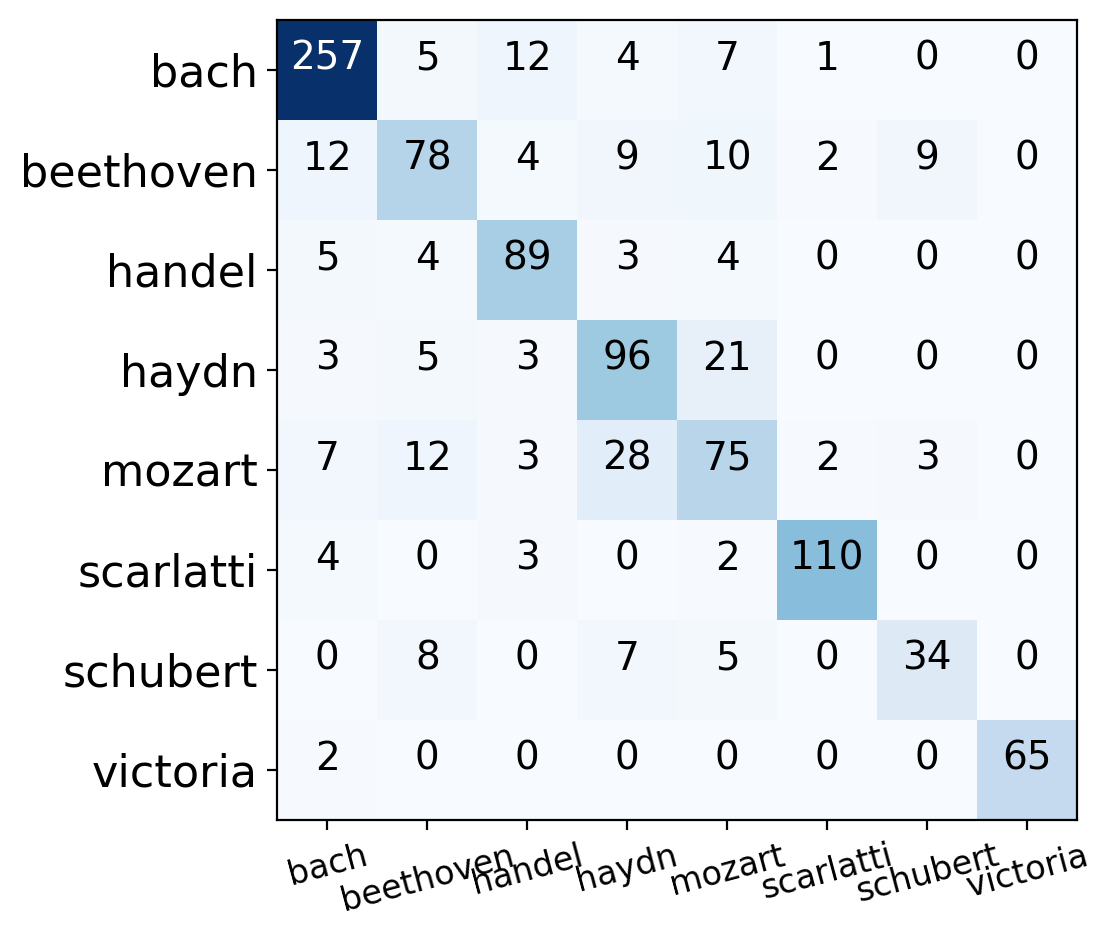

In [39]:
# Predicciones
y_pred = best_bst.predict(dtest)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, le.classes_, title="XGBoost")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#### SVM Kernel Gaussiano

In [40]:
%load_ext cuml.accel

The cuml.accel extension is already loaded. To reload it, use:
  %reload_ext cuml.accel


In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import mlflow
import mlflow.sklearn
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)

In [42]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Autor Classification")
mlflow.sklearn.autolog()

In [43]:
ovr_classifier = OneVsRestClassifier(
    SVC(
        kernel='rbf', probability=True
    )
)

In [44]:
with mlflow.start_run(run_name="SVM Kernel Gaussiano"):
    ovr_classifier.fit(X_train, y_train)
    
    y_pred = ovr_classifier.predict(X_test)
    f1_macro_test = f1_score(y_test, y_pred, average='weighted')
    f1_weighted_test = f1_score(y_test, y_pred, average='macro')
    accuracy_test = accuracy_score(y_test, y_pred)

    mlflow.log_metric("f1_macro_test", f1_macro_test)
    mlflow.log_metric("f1_weighted_test", f1_weighted_test)
    mlflow.log_metric("accuracy_test", accuracy_test)

🏃 View run SVM Kernel Gaussiano at: http://localhost:5000/#/experiments/158961068890504212/runs/65afaa125cac4044b02f1cf76767a816
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


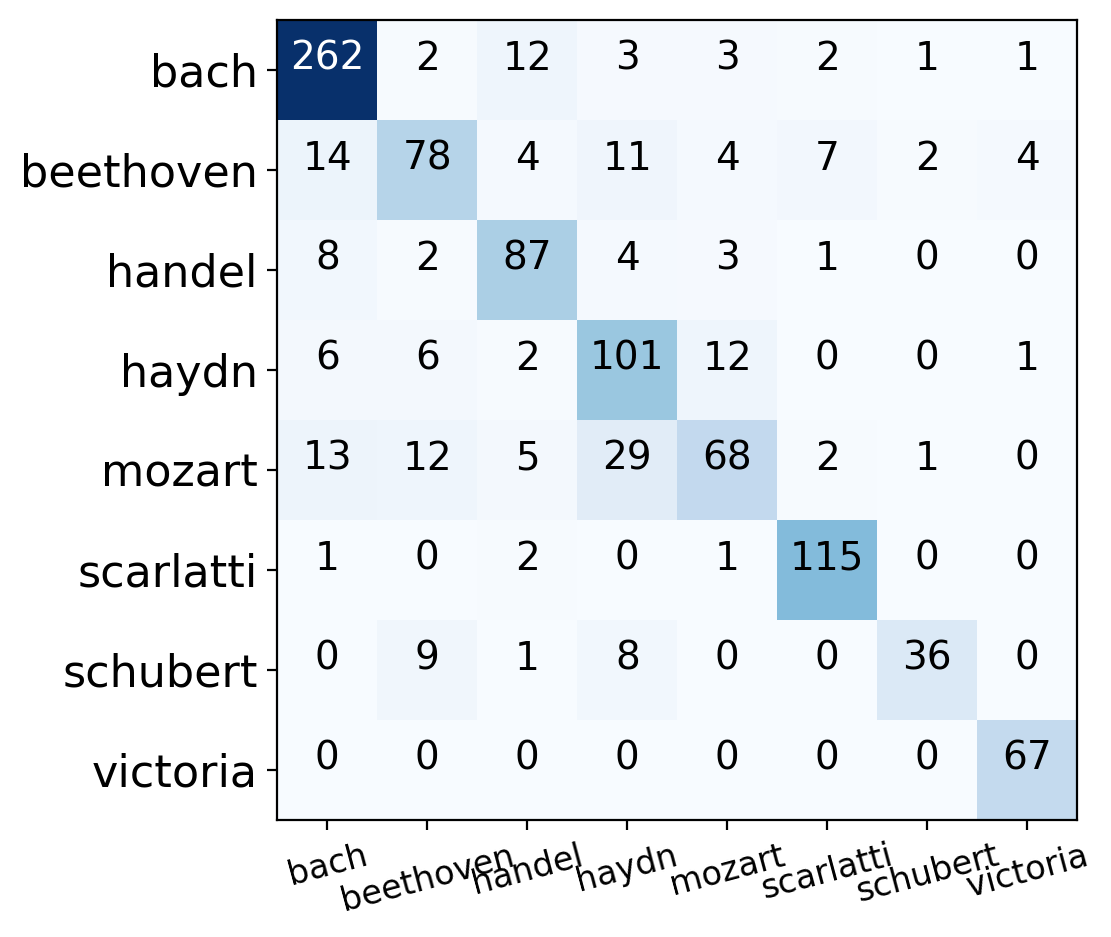

In [48]:

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, le.classes_, title="SVM Kernel Gaussiano")


In [49]:
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

        bach       0.86      0.92      0.89       286
   beethoven       0.72      0.63      0.67       124
      handel       0.77      0.83      0.80       105
       haydn       0.65      0.79      0.71       128
      mozart       0.75      0.52      0.62       130
   scarlatti       0.91      0.97      0.93       119
    schubert       0.90      0.67      0.77        54
    victoria       0.92      1.00      0.96        67

    accuracy                           0.80      1013
   macro avg       0.81      0.79      0.79      1013
weighted avg       0.80      0.80      0.80      1013



In [47]:
with open("../models/svm_rbf_ovr_classifier.pkl", "wb") as svm_file:
    pickle.dump(ovr_classifier, svm_file)